<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/Mohammadkaviany/MachineLearning.git

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel("/content/Real estate valuation data set.xlsx")


In [8]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
166,167,2013.416667,0.0,292.99780,6,24.97744,121.54458,73.6
103,104,2012.750000,0.0,208.39050,6,24.95618,121.53844,45.7
373,374,2013.083333,0.0,274.01440,1,24.97480,121.53059,52.2
105,106,2012.833333,0.0,292.99780,6,24.97744,121.54458,71.0
123,124,2013.416667,0.0,185.42960,0,24.97110,121.53170,45.5
...,...,...,...,...,...,...,...,...
128,129,2013.083333,41.3,124.99120,6,24.96674,121.54039,60.7
173,174,2013.083333,41.3,401.88070,4,24.98326,121.54460,35.1
361,362,2013.083333,41.4,281.20500,8,24.97345,121.54093,63.3
392,393,2013.083333,42.7,443.80200,6,24.97927,121.53874,35.3


In [7]:
df = df.sort_values("X2 house age")
#df.tail(30)

In [10]:
x = df["X2 house age"]
y = df["Y house price of unit area"]

In [11]:
x = np.array(x)
y = np.array(y)

<function matplotlib.pyplot.show(*args, **kw)>

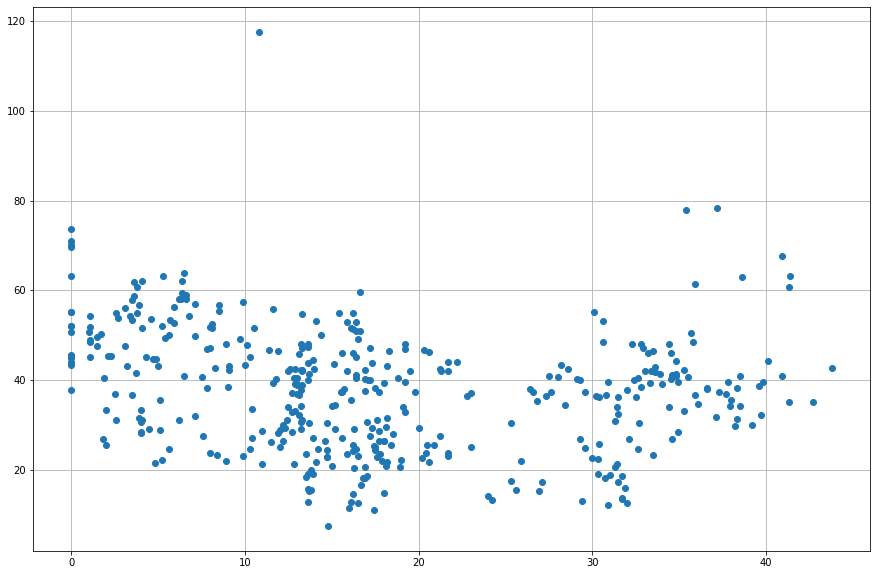

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, "o")
plt.grid()
plt.show

In [13]:
def line(theta0, theta1, X):

  h = np.array ( theta0 + (theta1 * X) )
  
  return h

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(x, line(), '-o')
plt.plot(x, y, "o")
plt.grid()
plt.show()

#Gredient Descent

In [15]:
def error(theta0, theta1, X):
  
  E  = 0.5 * sum( (line(theta0, theta1, X) - y)**2 )

  return E

In [16]:
def diff_E(theta0, theta1, X):

  dE = sum((line(theta0, theta1, X) - y))

  return dE

In [19]:
B0, B1 = np.random.rand(), np.random.rand()

4.861944194857684


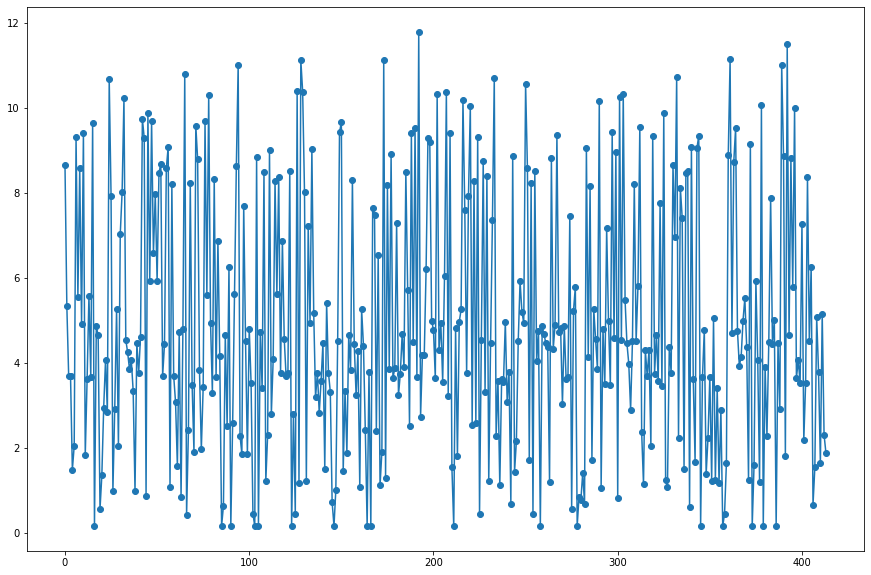

In [20]:
plt.figure(figsize=(15, 10))
plt.plot(line(B0, B1, x), "-o")
print(np.mean(line(B0, B1, x)))
plt.show()

In [71]:
steps = []
alpha = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000]
theta0 = []
theta1 = []

for i in alpha:
  B0, B1 = np.random.rand(), np.random.rand()
  iter = 0
  a = 0.00001
  dx = 0.000001
  E = error(B0, B1, x)
  dE = diff_E(B0, B1, x)
  
  while (abs(dE) > dx) and (iter < 10000) :
    
    B0 = B0 - (a * (dE))
    B1 = B1 - (a * (dE))
    
    dE = diff_E(B0, B1, x)

    
    
    
    iter += 1
  steps.append(iter)

  theta0.append(B0)
  theta1.append(B1)

  print(i, iter)
Thetas = list(zip(theta0, theta1))
print(Thetas)

1e-12 291
1e-11 290
1e-10 286
1e-09 286
1e-08 287
1e-07 287
1e-06 287
1e-05 289
0.0001 288
0.001 288
0.01 287
0.1 288
1 285
10 285
100 285
1000 290
10000 290
100000 290
[(2.8123322230918255, 1.985475856903201), (2.3906327618560983, 2.0092837904812315), (2.0384979847567855, 2.029164302925149), (2.218452213975039, 2.0190046069067247), (1.8242161710404097, 2.041262035217727), (1.7457158980527863, 2.0456939338939404), (1.736876000748671, 2.0461930089664815), (1.9878984431585516, 2.0320210068985687), (2.0279502668864438, 2.0297597966147722), (1.9333388381773238, 2.0351012846042082), (1.5528841624267107, 2.0565806567249765), (1.8408726215656546, 2.0403216601301466), (1.3092303936869656, 2.0703366447588274), (1.866076100933975, 2.038898744474969), (1.8334667392142106, 2.0407397748542273), (2.677451485566307, 1.9930908337644917), (2.387544405379818, 2.009458150177163), (2.0966896682586875, 2.025878968552891)]


Minimum : 285 
Index of Min Steps : 12 
Value of a for min steps : 1

theta0 is :1.3092303936869656
theta1 is :2.0703366447588274


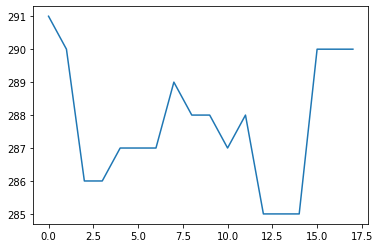

In [72]:

print(f"Minimum : {min(steps)} \nIndex of Min Steps : {steps.index(min(steps))} \nValue of a for min steps : {alpha[steps.index(min(steps))]}\n")
print(f"theta0 is :{(Thetas[steps.index(min(steps))])[0]}\ntheta1 is :{(Thetas[steps.index(min(steps))])[1]}")
plt.plot(steps)


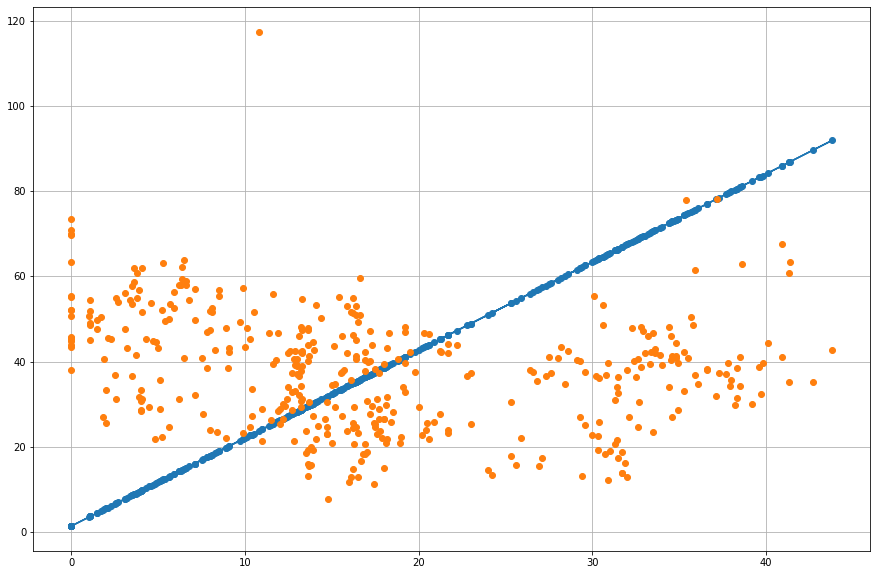

In [73]:
plt.figure(figsize=(15, 10))
plt.plot(x, line((Thetas[steps.index(min(steps))])[0], (Thetas[steps.index(min(steps))])[1], x), '-o')
plt.plot(x, y, "o")
plt.grid()
plt.show()

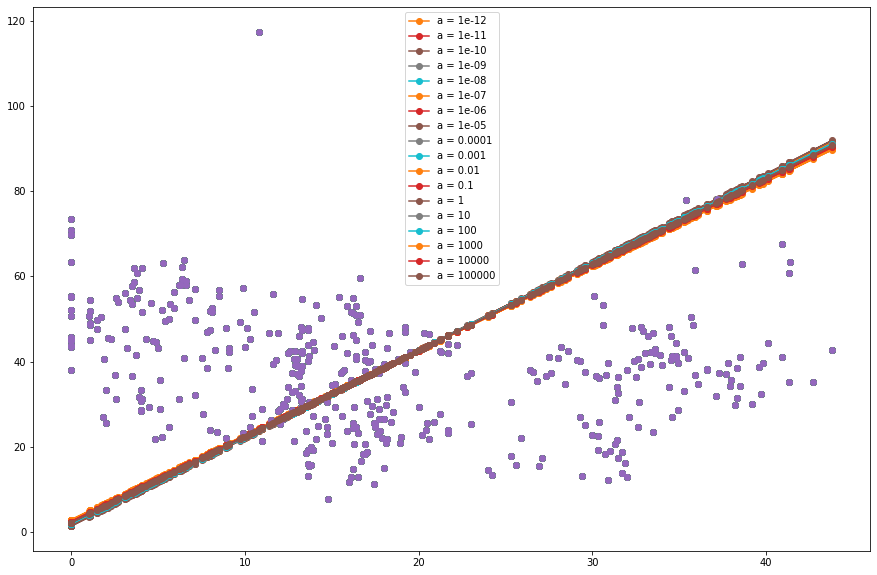

In [75]:
plt.figure(figsize=(15, 10))
for i in range(len(Thetas)):
  plt.plot(x, y, "o")
  plt.plot(x, line( (Thetas[i][0]), (Thetas[i][1]), x), '-o', label= f"a = {alpha[i]}")
  plt.plot()
  plt.grid()
  plt.legend()


plt.show()